In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = pd.read_csv('flipkart_product.csv', sep=',', encoding='latin1')
data.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [ ]:
# Rename columns for easier analysis
data.rename(columns={
    'ProductName': 'product_name',
    'Price': 'price',
    'Rate': 'rating',
    'Review': 'review_text',
    'Summary': 'summary'
}, inplace=True)

In [ ]:
data['price'] = data['price'].astype(str).apply(lambda x: re.sub(r'[^\d.,]', '', x))
data['price'] = data['price'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

In [ ]:
# Step 5: Display basic information
print("\n--- Dataset Information ---")
print(data.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_name  189874 non-null  object
 1   price         189874 non-null  object
 2   rating        189873 non-null  object
 3   review_text   189870 non-null  object
 4   summary       189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB
None


In [ ]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['price'] = data['price'].fillna(-1).astype(int)  # Replace NaN with -1 or any placeholder value and convert to int

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'] = data['rating'].fillna(-1).round().astype(int)  # Optional: Round ratings and convert to int

In [ ]:
# Step 6: Summarize numerical columns
print("\n--- Numerical Column Summary ---")
print(data.describe())


--- Numerical Column Summary ---
               price         rating
count  189874.000000  189874.000000
mean     4347.826348       4.114281
std     10204.660078       1.305123
min        -1.000000      -1.000000
25%       339.000000       4.000000
50%       699.000000       5.000000
75%      3399.000000       5.000000
max    101100.000000       5.000000


In [ ]:
# Step 7: Check for missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())


--- Missing Values ---
product_name     0
price            0
rating           0
review_text      4
summary         14
dtype: int64


In [ ]:
# Drop rows with NaN values in the 'review_text' column
data = data.dropna(subset=['review_text'])

In [ ]:
# Step 3: Check if any missing values are left
print("\n--- Missing Values After Cleaning ---")
print(data.isnull().sum())


--- Missing Values After Cleaning ---
product_name     0
price            0
rating           0
review_text      0
summary         13
dtype: int64


In [ ]:
# Step 4: Verify cleaned dataset
print("\n--- Cleaned Dataset Preview ---")
data.head()


--- Cleaned Dataset Preview ---


,product_name,price,rating,review_text,summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3,Fair,Ok ok product


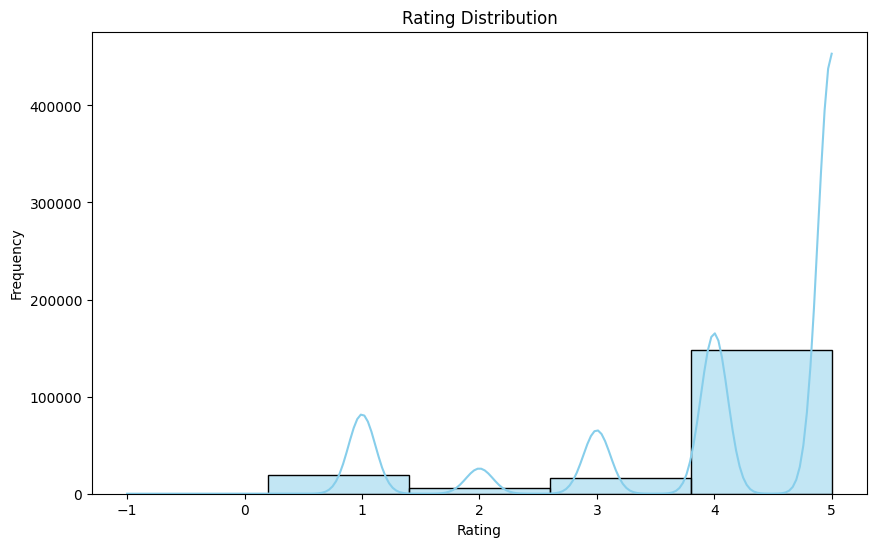

In [ ]:
# Step 8: Visualize distributions of numeric columns
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=5, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

# Initialize the tokenizer to keep only alphabets and numbers (basic tokenization)
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9\']+')

In [ ]:
# Function to clean and preprocess the review text
def clean_review(review):
    # Remove any unwanted characters or extra spaces (optional step)
    review = re.sub(r'[^\x00-\x7F]+', '', review)  # Remove non-ASCII characters
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra spaces
    return review

In [ ]:
# Apply cleaning and tokenization to the 'review_text' column
data['cleaned_review'] = data['review_text'].apply(clean_review)
data['tokenized_review'] = data['cleaned_review'].apply(lambda x: tokenizer.tokenize(x))

# Show the cleaned and tokenized reviews
print(data[['review_text', 'cleaned_review', 'tokenized_review']].head())

       review_text   cleaned_review    tokenized_review
0           Super!           Super!             [Super]
1          Awesome          Awesome           [Awesome]
2             Fair             Fair              [Fair]
3  Useless product  Useless product  [Useless, product]
4             Fair             Fair              [Fair]


In [ ]:
# Load the list of English stopwords
stop_words = nltk.corpus.stopwords.words('english')

# Print the list of stopwords
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n', 'a', 'r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(len(words))]

print("Lemmatized Words: ", lemmatized_words)

Lemmatized Words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']


In [ ]:
# stemmer
stemmer = nltk.stem.PorterStemmer()
words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
stemmed_words = [stemmer.stem(word) for word in words]

print("Stemmed Words: ", stemmed_words)

Stemmed Words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokenized_document = tokenizer.tokenize(text)

    # Remove stopwords and convert to lowercase
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

    # Apply stemming
    stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

    return stemmed_text

In [ ]:
# Apply the preprocess_text function to the 'review_text' column
data['processed_reviews'] = data['review_text'].apply(preprocess_text)

# Display the updated DataFrame
print(data[['review_text', 'processed_reviews']].head())

       review_text   processed_reviews
0           Super!             [super]
1          Awesome            [awesom]
2             Fair              [fair]
3  Useless product  [useless, product]
4             Fair              [fair]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Join the tokens back into a single string
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: ' '.join(x))

# Create the Term Frequency matrix
vectorizer = CountVectorizer()
tf_df = pd.DataFrame(vectorizer.fit_transform(data['processed_reviews']).toarray(), columns=vectorizer.get_feature_names_out())

# Display the matrix
print(tf_df)

        10  100  10k  10min  11  1100  11th  12  150  15k  ...  wr841  wrost  \
0        0    0    0      0   0     0     0   0    0    0  ...      0      0   
1        0    0    0      0   0     0     0   0    0    0  ...      0      0   
2        0    0    0      0   0     0     0   0    0    0  ...      0      0   
3        0    0    0      0   0     0     0   0    0    0  ...      0      0   
4        0    0    0      0   0     0     0   0    0    0  ...      0      0   
...     ..  ...  ...    ...  ..   ...   ...  ..  ...  ...  ...    ...    ...   
189865   0    0    0      0   0     0     0   0    0    0  ...      0      0   
189866   0    0    0      0   0     0     0   0    0    0  ...      0      0   
189867   0    0    0      0   0     0     0   0    0    0  ...      0      0   
189868   0    0    0      0   0     0     0   0    0    0  ...      0      0   
189869   0    0    0      0   0     0     0   0    0    0  ...      0      0   

        yaar  ye  year  yet  yield  yr 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split data, train model, and evaluate accuracy
X_train, X_test, y_train, y_test = train_test_split(tf_df, data['rating'], test_size=0.2, random_state=42)
nb_classifier = MultinomialNB().fit(X_train, y_train)
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.97%


In [ ]:
# Importing and Initializing Sentiment Analyzer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Get Sentiment Score and Apply to Reviews
def get_sentiment_score(review):
    return sia.polarity_scores(review)['compound']

data['sentiment_score'] = data['review_text'].apply(get_sentiment_score)

In [ ]:
# Classify Sentiment Based on Score
data['sentiment'] = data['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)
# Extract Sentiment Scores
data[['neg', 'neu', 'pos', 'compound']] = data['review_text'].apply(
    lambda x: pd.Series(sia.polarity_scores(x))
)

In [ ]:
#Display Results
data[['review_text', 'sentiment_score', 'sentiment', 'neg', 'neu', 'pos', 'compound']].head()

,review_text,sentiment_score,sentiment,neg,neu,pos,compound
0,Super!,0.6360,positive,0.000,0.000,1.0,0.6360
1,Awesome,0.6249,positive,0.000,0.000,1.0,0.6249
2,Fair,0.3182,positive,0.000,0.000,1.0,0.3182
3,Useless product,-0.4215,negative,0.737,0.263,0.0,-0.4215
4,Fair,0.3182,positive,0.000,0.000,1.0,0.3182


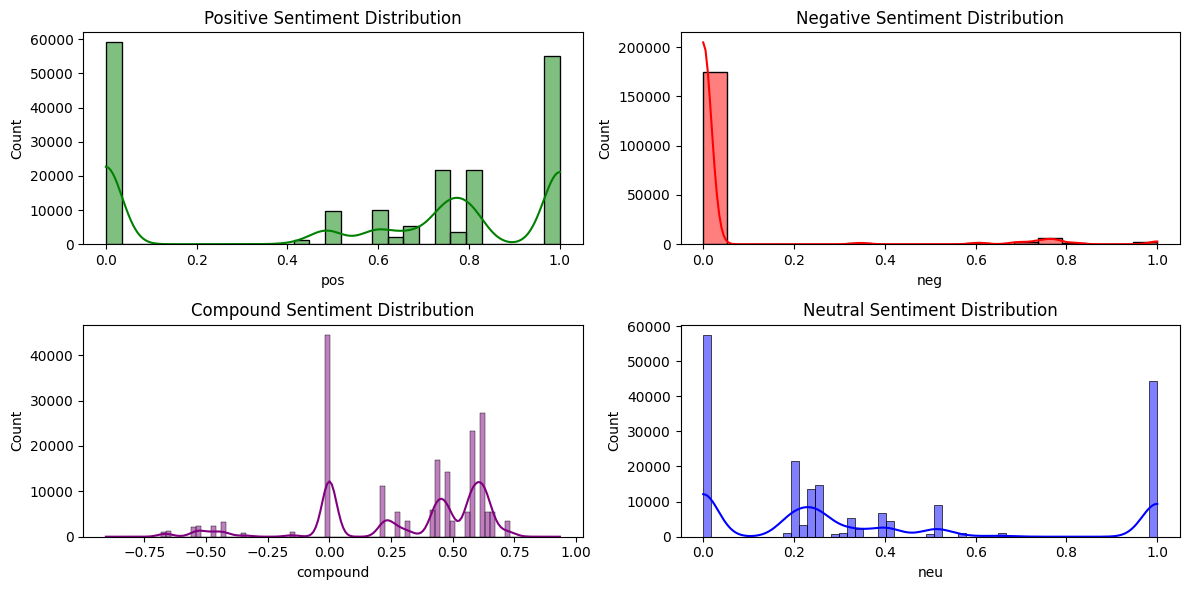

In [ ]:
# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Define plot parameters
sentiment_columns = ['pos', 'neg', 'compound', 'neu']
colors = ['green', 'red', 'purple', 'blue']
titles = ['Positive Sentiment Distribution', 'Negative Sentiment Distribution',
          'Compound Sentiment Distribution', 'Neutral Sentiment Distribution']

# Create histograms for each sentiment score
for ax, col, color, title in zip(axes.flatten(), sentiment_columns, colors, titles):
    sns.histplot(data[col], kde=True, color=color, ax=ax)
    ax.set_title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
negative_reviews_per_product = data[data['sentiment'] == 'negative'].groupby('product_name').size()

# Sort the negative reviews per product in descending order to get the top 10
top_10_negative_reviews = negative_reviews_per_product.sort_values(ascending=False).head(10)

# Display the top 10
print(top_10_negative_reviews)


product_name
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set, 18 Pieces Dinner SetÂ Â (White, Microwave Safe)    362
MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (Pack of 1, Silver, Steel)                                                     330
Kadio Analog 20 cm X 20 cm Wall ClockÂ Â (Beige, With Glass, Standard)                                                     247
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)                                                                 229
POCO C31 (Royal Blue, 64 GB)?ÿ?ÿ(4 GB RAM)                                                                                 204
Google Nest Mini (2nd Gen) with Google Assistant Smart Speaker?ÿ?ÿ(Chalk)                                                  181
CMerchants Multi Organiser BLue-4 Book Shelf Metal Open Book ShelfÂ Â (Finish Color - BLUE, DIY(Do-It-Yourself))           179
boAt Wave Neo with 1.69 inch , 2.5D Curved Display & Multiple Sports Modes SmartwatchÂ Â (Burgundy

In [ ]:
# Group by 'product_name' and 'sentiment', then calculate the percentage of negative reviews
negative_percentage = data.groupby('product_name')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)['negative'] * 100

# Sort the products by negative percentage and get the top 10
top_10_negative_reviews = negative_percentage.sort_values(ascending=False).head(10)

# Display the top 10 products with the highest percentage of negative reviews
print(top_10_negative_reviews)

product_name
Sai Store Light Blue Cotton CarpetÂ Â (150 cm,  X 210 cm, Rectangle)                                                                              55.000000
MAHARAJA WHITELINE Fortune FP - 102 600 W Food ProcessorÂ Â (White & Mystic Blue)                                                                 50.000000
WONDERCHEF Nutri-blend FP-Compact 350 W Food ProcessorÂ Â (Black)                                                                                 46.666667
PrintStar 12A / Q2612A Compatible Toner Cartridge For Hp1005 Canon 2900B Black Ink Cartridge                                                      45.000000
realme 4k Smart Google TV Stick (Black)?ÿ?ÿ(Black)                                                                                                45.000000
Party clue Printed Happy Birthday Combo 61 Pcs Birthday Banner Golden Curtain Confetti Ballons With BalloonÂ Â (Black, Gold, Pack of 61)          43.750000
X ZINI Infrared Induction Helicopter Sensor Aircraf

In [ ]:
import re

# Clean the 'processed_reviews' column
data['processed_reviews'] = data['processed_reviews'].apply(lambda x: re.sub(r'nan|\s+', ' ', str(x), flags=re.IGNORECASE).strip())

# Remove rows with empty or 'nan' entries
data = data[data['processed_reviews'].str.len() > 0]

# Verify no empty or NaN entries
print(data['processed_reviews'].head())
print(data['processed_reviews'].isna().sum())  # Should show 0

0              super
1             awesom
2               fair
3    useless product
4               fair
Name: processed_reviews, dtype: object
0


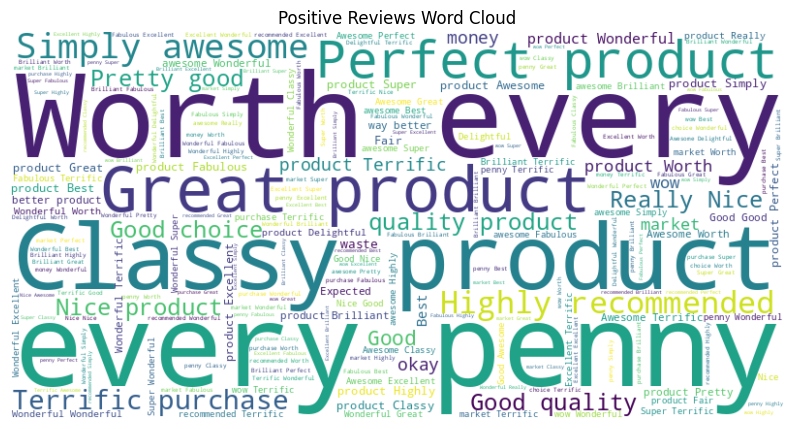

In [ ]:
# Filter positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review_text']

# Combine all positive review texts into one string
positive_reviews_text = ' '.join(positive_reviews)

# Generate word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Plot the positive word cloud
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Positive Reviews Word Cloud')
plt.show()


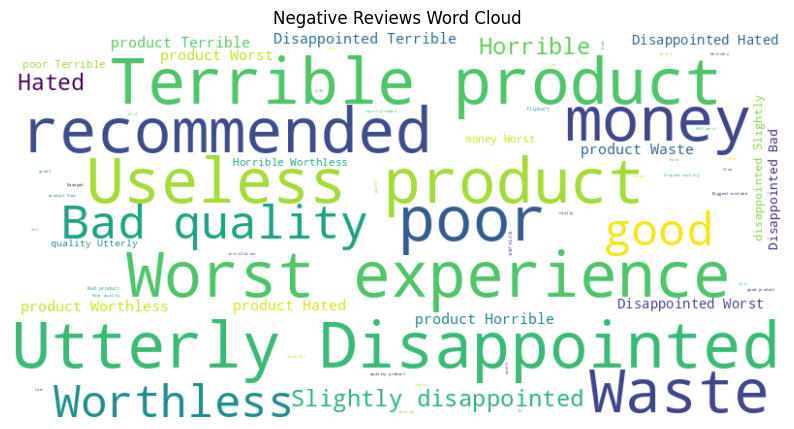

In [ ]:
# Filter negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['review_text']

# Combine all negative review texts into one string
negative_reviews_text = ' '.join(negative_reviews)

# Generate word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Plot the negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Negative Reviews Word Cloud')
plt.show()


In [ ]:
from nltk.probability import FreqDist

# Filter positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Flatten the tokenized reviews to create a list of tokens
positive_tokens = positive_reviews['tokenized_review'].explode()
negative_tokens = negative_reviews['tokenized_review'].explode()

# Create frequency distributions
pos_freqdist = FreqDist(positive_tokens)
neg_freqdist = FreqDist(negative_tokens)

# Tabulate the top 10 most frequent words
print("Top 10 Positive Words:")
pos_freqdist.tabulate(10)

print("\nTop 10 Negative Words:")
neg_freqdist.tabulate(10)

Top 10 Positive Words:
  product      Good  Terrific      Nice       the     Worth Wonderful      Just   Awesome      Best 
    24527     13114     10675      9468      8970      8967      8930      7607      5547      5487 

Top 10 Negative Words:
     product          Not           of        Waste        money Disappointed         Very      Utterly         poor     Terrible 
        2358         2001         1247         1233         1232         1217         1214         1214         1206         1205 


<Axes: xlabel='Samples', ylabel='Counts'>

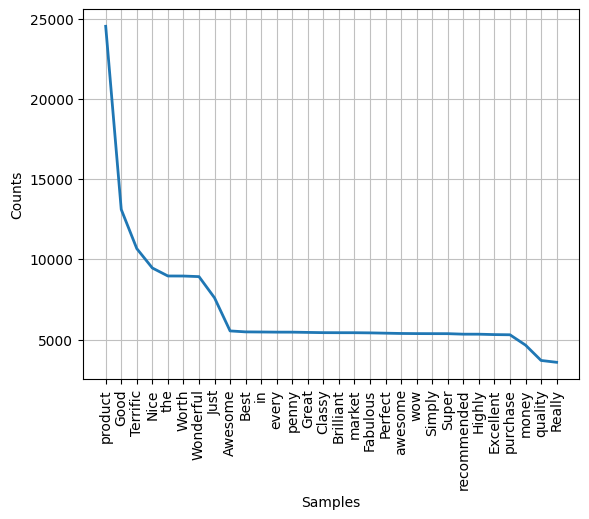

In [ ]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

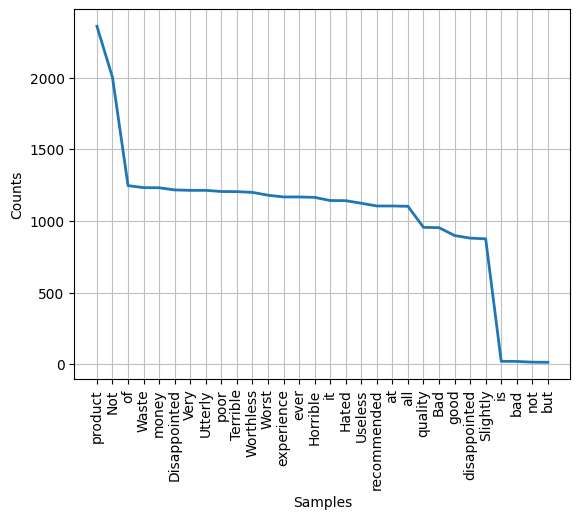

In [ ]:
neg_freqdist.plot(30)